# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

**My Response:**
First I wanted to clean up the data to get rid of missing values, separate the East and West coast into separate data frames that I could compare them, and I also created variables for the columns we would be comparing

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

tidal = pd.read_csv('/Users/delre/assignment-5/data/tidal_wetland_estuaries.csv')

tidaldata = tidal.replace(-9999, np.NaN)
missing = tidaldata.isnull()
#print(tidaldata)
#print(tidaldata[missing])

ec_soil = tidaldata.loc[tidaldata['coast']=='EAST',:].reset_index(drop=True)
wc_soil = tidaldata.loc[tidaldata['coast']=='WEST',:].reset_index(drop=True)

#print(wc_soil)
#print(ec_soil)

ec_soc_density = ec_soil['soc_density']
wc_soc_density = wc_soil['soc_density']

print(ec_soc_density)
print(wc_soc_density)

0     0.087
1     0.084
2     0.051
3     0.095
4     0.084
5     0.085
6     0.070
7     0.096
8     0.076
9     0.067
10    0.085
11    0.063
12    0.074
13    0.060
14    0.073
15    0.077
16    0.065
17    0.073
18    0.076
19    0.070
20    0.086
21    0.070
22    0.037
23    0.052
24    0.042
25    0.077
26    0.094
27    0.109
28    0.098
29    0.089
30    0.081
31    0.068
32    0.099
33    0.091
34    0.085
35    0.075
36    0.089
37    0.064
38    0.052
39    0.049
40    0.004
41    0.100
42    0.107
43    0.076
44    0.095
45    0.108
46    0.074
47    0.120
48    0.110
49    0.096
50    0.044
51    0.082
Name: soc_density, dtype: float64
0     0.014
1     0.023
2     0.007
3     0.004
4     0.002
5     0.046
6     0.017
7     0.012
8     0.080
9     0.034
10    0.024
11    0.039
12    0.041
13    0.031
14    0.036
15    0.048
16    0.055
17    0.048
18    0.052
19    0.052
20    0.044
21    0.044
22    0.055
23    0.054
24    0.050
25    0.034
26    0.051
27    0.053
28    

Then, to check whether the data was normally distributed or not, I made some histograms

0.07757692307692311 is the mean value for East Coast Soil Density
0.077 is the median value for East Coast soil density


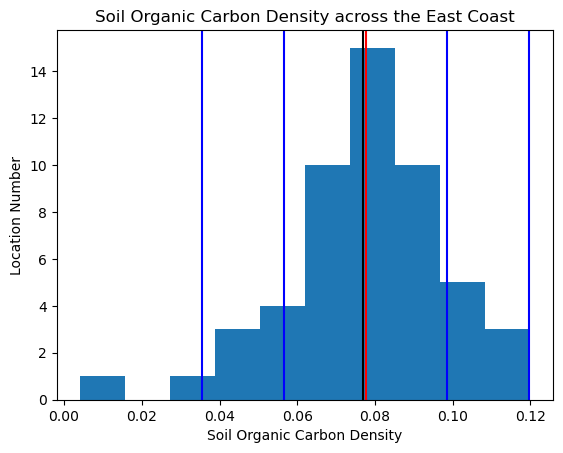

This histogram shows the east coast soil density data is normally distributed
The mean and median are about equal and the data is distributed about equally around the mean

0.03779310344827588 is the mean value for West Coast Soil Density
0.044 is the median value for West Coast soil density


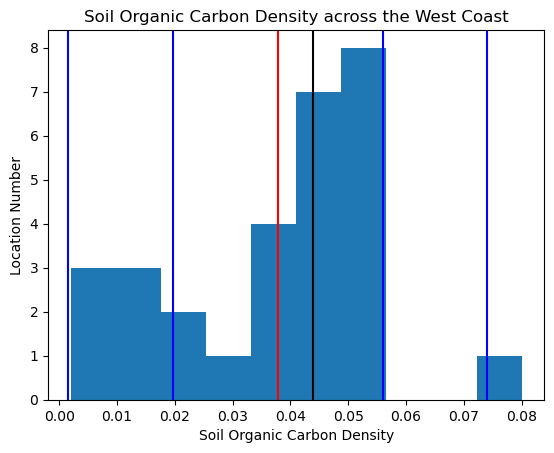

This histogram shows the West coast soil density data is NOT normally distributed
I ran a log10 transformation to try to fix it
-1.5201968567425423 is the mean value for West Coast Soil Density transformed log10
-1.3565473235138126 is the median value for West Coast soil density transformed log10


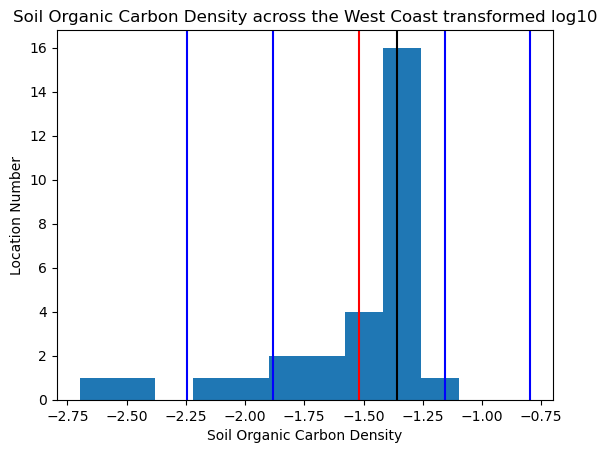

The data for West Coast Soil density is still skewed, so I ran a square root transformation
0.18612615180603437 is the mean value for West Coast Soil Density transformed sqrt
0.20976176963403032 is the median value for West Coast soil density transformed sqrt


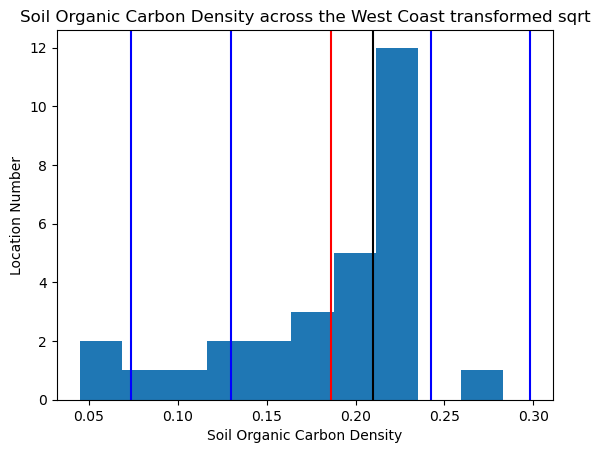

The data for West Coast Soil density is still skewed
The data for West Coast soil density does not meet the criteria for normal data
Since the log10 transformation was closesest to normal data, I decideded to use that going forward


In [100]:
ec_mean_soc_density = ec_soc_density.mean()
print(ec_mean_soc_density, 'is the mean value for East Coast Soil Density')

ec_median_soc_density = ec_soc_density.median()
print(ec_median_soc_density, 'is the median value for East Coast soil density')

ec_std_soc_density = np.std(ec_soc_density)

plt.hist(ec_soc_density)
plt.title('Soil Organic Carbon Density across the East Coast')
plt.xlabel('Soil Organic Carbon Density')
plt.ylabel('Location Number')
plt.axvline(x=ec_mean_soc_density, color="red")
plt.axvline(x=ec_median_soc_density, color="black")
plt.axvline(x=ec_mean_soc_density-ec_std_soc_density, color="blue")
plt.axvline(x=ec_mean_soc_density+ec_std_soc_density, color="blue")
plt.axvline(x=ec_mean_soc_density-2*ec_std_soc_density, color="blue")
plt.axvline(x=ec_mean_soc_density+2*ec_std_soc_density, color="blue")
plt.show()
print('This histogram shows the east coast soil density data is normally distributed')
print('The mean and median are about equal and the data is distributed about equally around the mean')
print("")

wc_mean_soc_density = wc_soc_density.mean()
print(wc_mean_soc_density, 'is the mean value for West Coast Soil Density')

wc_median_soc_density = wc_soc_density.median()
print(wc_median_soc_density, 'is the median value for West Coast soil density')

wc_std_soc_density = np.std(wc_soc_density)

plt.hist(wc_soc_density)
plt.title('Soil Organic Carbon Density across the West Coast')
plt.xlabel('Soil Organic Carbon Density')
plt.ylabel('Location Number')
plt.axvline(x=wc_mean_soc_density, color="red")
plt.axvline(x=wc_median_soc_density, color="black")
plt.axvline(x=wc_mean_soc_density-wc_std_soc_density, color="blue")
plt.axvline(x=wc_mean_soc_density+wc_std_soc_density, color="blue")
plt.axvline(x=wc_mean_soc_density-2*wc_std_soc_density, color="blue")
plt.axvline(x=wc_mean_soc_density+2*wc_std_soc_density, color="blue")
plt.show()
print('This histogram shows the West coast soil density data is NOT normally distributed')
print('I ran a log10 transformation to try to fix it')

wc_soc_density_log10 = np.log10(wc_soc_density)

wc_mean_soc_density_log10 = wc_soc_density_log10.mean()
print(wc_mean_soc_density_log10, 'is the mean value for West Coast Soil Density transformed log10')

wc_median_soc_density_log10 = wc_soc_density_log10.median()
print(wc_median_soc_density_log10, 'is the median value for West Coast soil density transformed log10')

wc_std_soc_density_log10 = np.std(wc_soc_density_log10)

plt.hist(wc_soc_density_log10)
plt.title('Soil Organic Carbon Density across the West Coast transformed log10')
plt.xlabel('Soil Organic Carbon Density')
plt.ylabel('Location Number')
plt.axvline(x=wc_mean_soc_density_log10, color="red")
plt.axvline(x=wc_median_soc_density_log10, color="black")
plt.axvline(x=wc_mean_soc_density_log10-wc_std_soc_density_log10, color="blue")
plt.axvline(x=wc_mean_soc_density_log10+wc_std_soc_density_log10, color="blue")
plt.axvline(x=wc_mean_soc_density_log10-2*wc_std_soc_density_log10, color="blue")
plt.axvline(x=wc_mean_soc_density_log10+2*wc_std_soc_density_log10, color="blue")
plt.show()
print('The data for West Coast Soil density is still skewed, so I ran a square root transformation')

wc_soc_density_sqrt = np.sqrt(wc_soc_density)

wc_mean_soc_density_sqrt = wc_soc_density_sqrt.mean()
print(wc_mean_soc_density_sqrt, 'is the mean value for West Coast Soil Density transformed sqrt')

wc_median_soc_density_sqrt = wc_soc_density_sqrt.median()
print(wc_median_soc_density_sqrt, 'is the median value for West Coast soil density transformed sqrt')

wc_std_soc_density_sqrt = np.std(wc_soc_density_sqrt)

plt.hist(wc_soc_density_sqrt)
plt.title('Soil Organic Carbon Density across the West Coast transformed sqrt')
plt.xlabel('Soil Organic Carbon Density')
plt.ylabel('Location Number')
plt.axvline(x=wc_mean_soc_density_sqrt, color="red")
plt.axvline(x=wc_median_soc_density_sqrt, color="black")
plt.axvline(x=wc_mean_soc_density_sqrt-wc_std_soc_density_sqrt, color="blue")
plt.axvline(x=wc_mean_soc_density_sqrt+wc_std_soc_density_sqrt, color="blue")
plt.axvline(x=wc_mean_soc_density_sqrt-2*wc_std_soc_density_sqrt, color="blue")
plt.axvline(x=wc_mean_soc_density_sqrt+2*wc_std_soc_density_sqrt, color="blue")
plt.show()
print('The data for West Coast Soil density is still skewed')
print('The data for West Coast soil density does not meet the criteria for normal data')
print('Since the log10 transformation was closesest to normal data, I decideded to use that going forward')

Then, I was ready to run a T-Test.
The hypothesis that soil organic carbon density is **larger** in the east coast than the west coast compares two different groups of data -- one representing soil collected on the east coast, and one on the other side of the country on the west coast.
**A 2-sample T test is therefore the appropriate way to test this hypothesis. A 2-sample T test will compare the mean organic carbon density of soil on the two separate coasts**

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [ ]:
from utils import Linear_Reg_Diagnostic # do not change!

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)